<a href="https://colab.research.google.com/github/Yospy/Horse-and-Human-Prediction-using-CNN/blob/main/Horse_And_Human_Prediction_using_CNN_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip


--2021-10-01 04:57:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   105MB/s    in 1.4s    

2021-10-01 04:57:07 (105 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
local_zip = '/tmp/horse-or-human.zip'
zipref = zipfile.ZipFile(local_zip,'r')
zipref.extractall('/tmp/horse-or-human')
zipref.close()

In [ ]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:5])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:5])

['horse46-3.png', 'horse17-5.png', 'horse38-4.png', 'horse33-3.png', 'horse36-4.png']
['human07-30.png', 'human02-02.png', 'human12-04.png', 'human01-29.png', 'human16-18.png']


In [ ]:
print("Total training horse images:",len(os.listdir(train_horse_dir)))
print("Total training human images:",len(os.listdir(train_human_dir)))

Total training horse images: 500
Total training human images: 527


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4
pic_index = 0

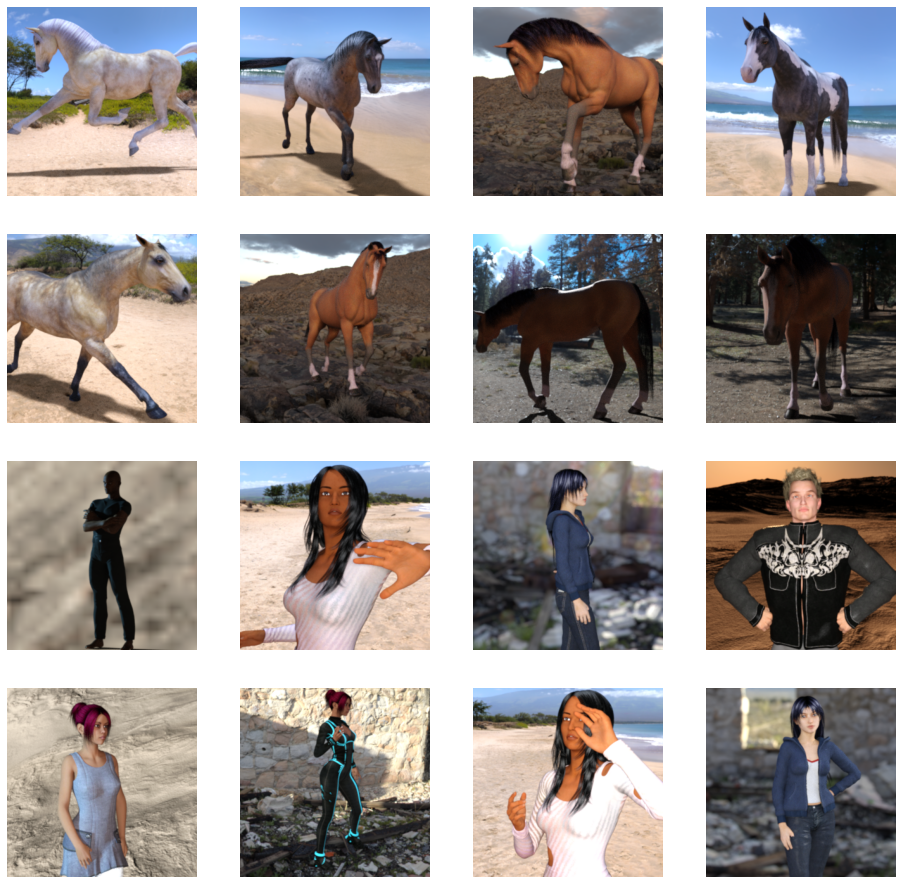

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4,ncols*4)

pic_index +=8

next_horse_pix = [os.path.join(train_horse_dir,fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir,fname)
                  for fname in train_human_names[pic_index-8:pic_index]]  

for i,img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)


plt.show()               
         

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(16,(3,3),input_shape=(300,300,3),activation = 'relu'),
                        tf.keras.layers.MaxPool2D(2,2),
                        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),  
                        tf.keras.layers.MaxPool2D(2,2),
                        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                        tf.keras.layers.MaxPool2D(2,2),
                        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                        tf.keras.layers.MaxPool2D(2,2),
                        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                        tf.keras.layers.MaxPool2D(2,2),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512,activation='relu'),
                        tf.keras.layers.Dense(1,activation='sigmoid')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 33, 33, 64)        3

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
               loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human/',batch_size=128,target_size=(300,300),class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,steps_per_epoch=8,epochs=15,verbose=1)

Epoch 1/15
8/8 [==============================] - 76s 9s/step - loss: 0.0187 - accuracy: 0.9956
Epoch 2/15
8/8 [==============================] - 76s 11s/step - loss: 1.1111 - accuracy: 0.8988
Epoch 3/15
8/8 [==============================] - 75s 9s/step - loss: 0.0490 - accuracy: 0.9900
Epoch 4/15
8/8 [==============================] - 75s 11s/step - loss: 0.0322 - accuracy: 0.9878
Epoch 5/15
8/8 [==============================] - 75s 9s/step - loss: 0.0064 - accuracy: 0.9989
Epoch 6/15
8/8 [==============================] - 75s 9s/step - loss: 0.0028 - accuracy: 1.0000
Epoch 7/15
8/8 [==============================] - 75s 9s/step - loss: 0.0017 - accuracy: 1.0000
Epoch 8/15
8/8 [==============================] - 75s 9s/step - loss: 0.7062 - accuracy: 0.9099
Epoch 9/15
8/8 [==============================] - 75s 9s/step - loss: 0.0330 - accuracy: 0.9933
Epoch 10/15
8/8 [==============================] - 75s 9s/step - loss: 0.0084 - accuracy: 0.9989
Epoch 11/15
8/8 [====================

In [ ]:
from numpy import *
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn 
  img = image.load_img(path,target_size=(300,300))
  x = image.img_to_array(img)
  x = expand_dims(x,axis=0)

  images = vstack([x])
  classes = model.predict(images,batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " Its a human")
  else:
    print(fn + " Its a horse")
  
    

Saving Unknown-2 to Unknown-2 (2)
Saving Unknown-3 to Unknown-3 (3)
[0.]
Unknown-2 Its a horse
[0.]
Unknown-3 Its a horse


In [ ]:
import os,signal
os.kill(os.getpid(), signal.SIGKILL)